In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

2023-10-31 12:48:56.318845: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-31 12:48:56.362101: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-31 12:48:56.362144: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-31 12:48:56.362177: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-31 12:48:56.370257: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-31 12:48:56.370698: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

# Explore the image data

In [5]:
label = ['airplane','automobile','bird','cat','deer','dog','frog',
         'horse','ship','truck']

In [6]:
label

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

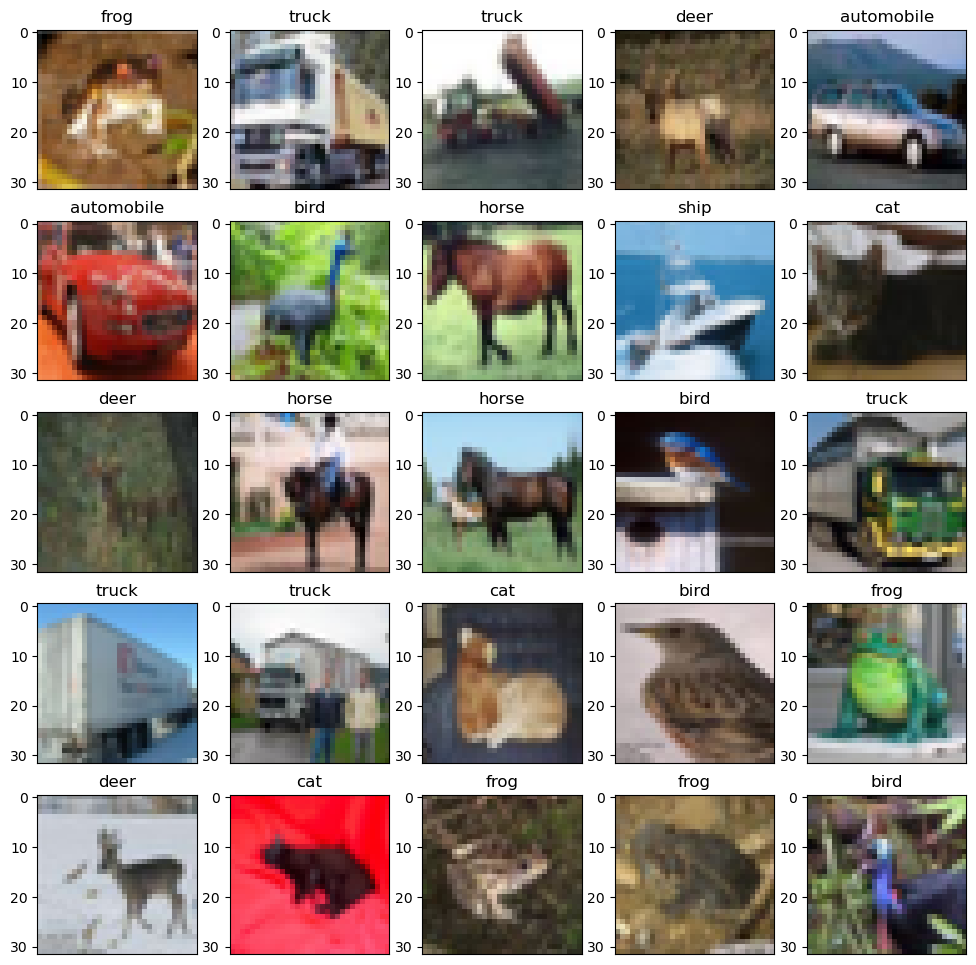

In [7]:
# display a 5x5 grid of random images from the training set with their
# labels

plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.title(label[y_train[i][0]])
    plt.imshow(x_train[i])

In [8]:
# the pixel value of the images are scaled between 0 to 1 by 
# dividing it by 255

x_train = x_train/255
x_test = x_test/255

# One hot encoding

In [9]:
from keras.utils import to_categorical

In [10]:
y_train_new = to_categorical(y_train)
y_test_new = to_categorical(y_test)

In [11]:
y_train_new.shape

(50000, 10)

# Build the model

In [12]:
model = Sequential()

# conv2D -> 2D convolutional layer.
# building block of CNNs,
model.add(Conv2D(filters=32, input_shape=(32,32,3), kernel_size=(3,3),
                 activation='relu'))

# maxpool downsamples the input by taking the maximum 
# value in a local region.
model.add(MaxPool2D(pool_size=(2,2)))

# regularization 
# It randomly sets a fraction of input units to 0 during training,
# which helps prevent overfitting.
model.add(Dropout(0.2))

# Adding More Convolutional Layers
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#prepares the data for the fully connected layers.
model.add(Flatten())

# Adding Fully Connected Layers:
# The first dense layer has 512 units with ReLU activation.
# The final dense layer has 10 units with softmax activation,
# suitable for 10-class classification
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 32)          1

# Compile the model

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])

# Train the model

In [17]:
model.fit(x_train,y_train_new, epochs=15,batch_size=20)

Epoch 1/15
   9/2500 [..............................] - ETA: 36s - loss: 0.7368 - accuracy: 0.7111

2023-10-31 12:56:45.718553: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


2500/2500 [==============================] - 34s 14ms/step - loss: 0.7132 - accuracy: 0.7474
Epoch 2/15
2500/2500 [==============================] - 35s 14ms/step - loss: 0.6961 - accuracy: 0.7530
Epoch 3/15
2500/2500 [==============================] - 35s 14ms/step - loss: 0.6761 - accuracy: 0.7581
Epoch 4/15
2500/2500 [==============================] - 37s 15ms/step - loss: 0.6531 - accuracy: 0.7706
Epoch 5/15
2500/2500 [==============================] - 35s 14ms/step - loss: 0.6394 - accuracy: 0.7733
Epoch 6/15
2500/2500 [==============================] - 35s 14ms/step - loss: 0.6238 - accuracy: 0.7781
Epoch 7/15
2500/2500 [==============================] - 35s 14ms/step - loss: 0.6025 - accuracy: 0.7856
Epoch 8/15
2500/2500 [==============================] - 36s 14ms/step - loss: 0.5977 - accuracy: 0.7877
Epoch 9/15
2500/2500 [==============================] - 36s 14ms/step - loss: 0.5870 - accuracy: 0.7920
Epoch 10/15
2500/2500 [==============================] - 36s 15ms/step - lo

In [18]:
model.evaluate(x_test, y_test_new, batch_size=1)

10000/10000 [==============================] - 18s 2ms/step - loss: 0.9525 - accuracy: 0.7067


[0.9524903297424316, 0.7067000269889832]

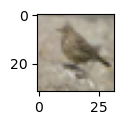

In [19]:
plt.figure(figsize=(1,1))
plt.imshow(x_train[120])

In [21]:
new = x_train[120]
new = new.reshape(1,32,32,3)
label[np.argmax(model.predict(new, verbose=0))]

# This predicts the class probabilities for the given input 
# argmax -> finds the index of the class with
# highest probability

'bird'